In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


%matplotlib inline

In [3]:
##  1 + x - 2x^2
P = np.polynomial.Polynomial( [1, 1, -2] )
print(P(2))

print(1 + 2 - 2 * 2**2)

-5.0
-5


<a href="https://en.wikipedia.org/wiki/Legendre_polynomials">Legendre polynomial article on Wikipedia</a>

The first five Legendre polynomials are,
$$
\begin{array}{lll}
P_0 & = & 1 \\
P_1 & = & x \\
P_2 & = & \frac{1}{2}(3x^2 - 1) \\
P_3 & = & \frac{1}{2}(5x^3 -3x) \\
P_4 & = & \frac{1}{8}(35x^4 -30x^2 + 3)\\
 & \vdots & 
\end{array}
$$

Orthogonality relation,
$$
\int^1_{-1} P_m(x)P_n(x) dx = \frac{2}{2n + 1}\delta_{m,n}
$$


We can write a function as an expansion of Legendre polynomials,
$$
f(x) = \sum_{b = 0}^\infty a_nP_n(x)
$$

The coeficients are given by,
$$
a_n = \frac{2n+1}{2} \int^1_{-1}f(x)p_n dx
$$

Text(0, 0.5, 'yy')

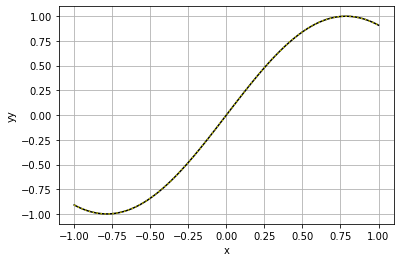

In [7]:
#  Load in calculated coefficients using the above formula
coefs = np.loadtxt('coefs.txt')

#  Generate Polynomial using our coefficients.  This approximates
#  The sine function we are using below.
P = np.polynomial.legendre.Legendre( coefs )

#  We want an approximation for sin(2x)
x = np.linspace(-1, 1, 100)
y = np.sin(2 * x)

#  Plot the original function and the polynomial approximation
plt.plot(x, y, 'k')
plt.plot(x, P(x), 'y:')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('yy')

Text(0.5, 0, 'x')

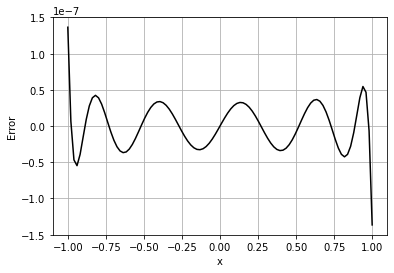

In [8]:
#  Calculate and plot the rror between the two curves
plt.plot(x, y - P(x), 'k')
plt.grid(True)
plt.ylabel('Error')
plt.xlabel('x')

In [27]:
#  Calculate the roots.  There should only be one real root in the interval [-1, 1]
R = P.roots()
for r in R:
    print(r)

(-2.7417241214572146-1.4910929084163642j)
(-2.7417241214572146+1.4910929084163642j)
(-2.5797447408045104+0j)
(-1.5717184815613072+0j)
0j
(1.571718481561308+0j)
(2.579744740804512+0j)
(2.7417241214572154-1.4910929084163678j)
(2.7417241214572154+1.4910929084163678j)


###  Chebyshev Polynomials

The first few Chebyshev polynomials,
$$
\begin{array}{lll}
T_0 & = & 1 \\
T_1 & = & x \\
T_2 & = & 2x^2 - 1 \\
T_3 & = & 4x^3 - 3x \\
T_4 & = & 8x^4 - 8x^2 + 1 \\
   & \vdots & 
\end{array}
$$

These polynomials are also orthogonal with the relation,
$$
\int_{-1}^1 T_n(x) T_m(x) \frac{dx}{\sqrt{1 - x^2}} = 
\begin{cases}
0   & \mbox{if} \; n \neq m, \\
\pi  & \mbox{if} \; n = m = 0, \\
\frac{\pi}{2} & \mbox{if} \; m = n \neq 0
\end{cases}
$$

###  Chebyshev Nodes

<a href="https://en.wikipedia.org/wiki/Chebyshev_nodes">Wikipedia article on Chebyshev nodes.</A>

As we showed in a previous video, high-order polynomial fits tend to do a horrible job at the end points.

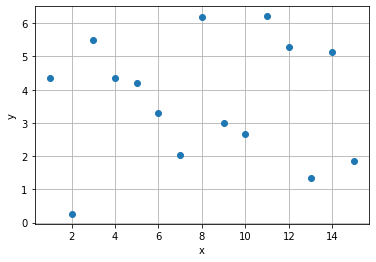

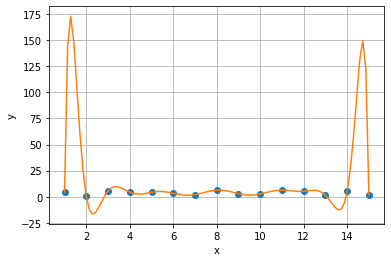

In [10]:
#  Generate and plot the points
np.random.seed(2)
x = np.arange(1, 16)
y = 10 * np.random.rand(x.size)

plt.plot(x, y, 'o')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

#  Calculate the polynomial coefficients
L = lagrange(x, y)
L = np.polynomial.polynomial.Polynomial(L).coef

plt.figure()
plt.plot(x, y, 'o')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

#  plot the polynomial
X = np.linspace(1, 15, 100)
plt.plot(X, np.polyval(L, X))
plt.grid(True)

Text(0, 0.5, 'y)')

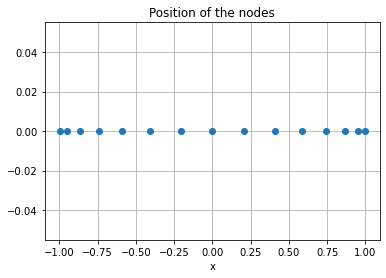

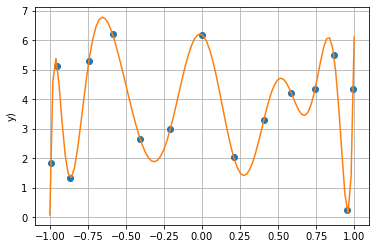

In [12]:
#  Generate the Chebyshev nodes
x = np.arange(1, 16)
n = x.size
x = np.cos((2*x-1) / (2 * n) * np.pi )

#  Plot them so we can see how they are distributed
plt.plot(x, np.zeros(x.size), 'o')
plt.grid(True)
plt.title('Position of the nodes')
plt.xlabel('x')

#  Polynomial coefficients using the new nodes
L = lagrange(x, y)
L = np.polynomial.polynomial.Polynomial(L).coef

#  plot the polynomial
plt.figure()
plt.plot(x, y, 'o')
X = np.linspace(-1, 1, 100)
plt.plot(X, np.polyval(L, X))
plt.grid(True)
plt.xlabel('')
plt.ylabel('y)')

The nodes used above should be the roots of our 15th order polynomial.  Let's show that by using the Chebyshev.root() function.

In [13]:
#  Generate the coefficients
coefs = [0,] * 16
coefs[-1] = 1

#  Make the polynomial object.
C = np.polynomial.chebyshev.Chebyshev(coefs)

#  Calculate the roots
R = C.roots()

#  Make sure our nodes from the cell above are in ascending order
x = np.sort(x)

#  Print both the roots and the nodes from above out together.
for r, u in zip(R, x):
    print(r, u)

#  Are they the same?
print( np.allclose(x, R)) 

-0.994521895368274 -0.9945218953682733
-0.9510565162951536 -0.9510565162951535
-0.8660254037844402 -0.8660254037844387
-0.7431448254773937 -0.7431448254773944
-0.5877852522924745 -0.587785252292473
-0.4067366430758 -0.4067366430758001
-0.20791169081775945 -0.20791169081775912
-7.781531137276687e-17 6.123233995736766e-17
0.20791169081775931 0.20791169081775923
0.40673664307579965 0.4067366430758004
0.5877852522924734 0.5877852522924731
0.7431448254773939 0.7431448254773942
0.866025403784439 0.8660254037844387
0.951056516295154 0.9510565162951535
0.9945218953682738 0.9945218953682733
True
